In [2]:
#first i have imported numpy and matplotlib libraries and created a variable that has the path of weather data file
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
file_path = 'weather.csv'

In [3]:
#DATA EXPLORATION AND CLEANING
#here i have created a data variable that reads all the data included in weather.csv file.
#for that i have used np.genfromtxt that is a powerful function in the NumPy library used to read data from text files into a NumPy array.

data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
print("Weather data:",data)

#lets see the shape of the data
print(" \n Shape of weather data:",data.shape)

#lets see the values inside data
print(data[0,0])
print(data[0,1])
print(data[0,5])


Weather data: [[ 8.  24.3  0.  ...  nan  3.6  nan]
 [14.  26.9  3.6 ...  nan  3.6  nan]
 [13.7 23.4  3.6 ...  nan 39.8  nan]
 ...
 [12.5 19.9  0.  ...  nan  0.   nan]
 [12.5 26.9  0.  ...  nan  0.   nan]
 [12.3 30.2  0.  ...  nan  0.   nan]]
 
 Shape of weather data: (366, 22)
8.0
24.3
nan


In [4]:
#Data Cleaning
#here i have changed the nan values to zero by using nan_to_num function of numpy
modified_data = np.nan_to_num(data, nan=0)
#example
print(modified_data[2])


[  13.7   23.4    3.6    5.8    3.3    0.    85.     0.     0.     6.
    6.    82.    69.  1009.5 1007.2    8.     7.    15.4   20.2    0.
   39.8    0. ]


In [5]:
#STATISTICAL ANALYSIS
#lets extract relevant columns by slicing method
min_temp = modified_data[:,0]
max_temp = modified_data[:,1]
rainfall = modified_data[:,2]
evaporation = modified_data[:,3]
sunshine = modified_data[:,4]

#lets calculate statistical quantities
min_temp_stats = {
    'min': np.min(min_temp),
    'max': np.max(min_temp),
    'mean': np.mean(min_temp),
    'median': np.median(min_temp),
    'std': np.std(min_temp)
}
print("Minimum Temperature Statistical Quantities: ", min_temp_stats)

max_temp_stats = {
    'min': np.min(max_temp),
    'max': np.max(max_temp),
    'mean': np.mean(max_temp),
    'median': np.median(max_temp),
    'std': np.std(max_temp)
}
print("Maximum Temperature Statistical Quantities: ", max_temp_stats)

rainfall_stats = {
    'min': np.min(rainfall),
    'max': np.max(rainfall),
    'mean': np.mean(rainfall),
    'median': np.median(rainfall),
    'std': np.std(rainfall)
}
print("Rainfall Statistical Quantities: ", rainfall_stats)

evaporation_stats = {
    'min': np.min(evaporation),
    'max': np.max(evaporation),
    'mean': np.mean(evaporation),
    'median': np.median(evaporation),
    'std': np.std(evaporation)
}
print("Evaporation Statistical Quantities: ", evaporation_stats)

sunshine_stats = {
    'min': np.min(sunshine),
    'max': np.max(sunshine),
    'mean': np.mean(sunshine),
    'median': np.median(sunshine),
    'std': np.std(sunshine)
}
print("Sunshine Statistical Quantities: ", sunshine_stats)


Minimum Temperature Statistical Quantities:  {'min': -5.3, 'max': 20.9, 'mean': 7.265573770491804, 'median': 7.45, 'std': 6.017562236643699}
Maximum Temperature Statistical Quantities:  {'min': 7.6, 'max': 35.8, 'mean': 20.550273224043714, 'median': 19.65, 'std': 6.6813693691233755}
Rainfall Statistical Quantities:  {'min': 0.0, 'max': 39.8, 'mean': 1.428415300546448, 'median': 0.0, 'std': 4.220022686881989}
Evaporation Statistical Quantities:  {'min': 0.2, 'max': 13.8, 'mean': 4.521857923497268, 'median': 4.2, 'std': 2.6657333424478735}
Sunshine Statistical Quantities:  {'min': 0.0, 'max': 13.6, 'mean': 7.844535519125684, 'median': 8.6, 'std': 3.5351181456046414}


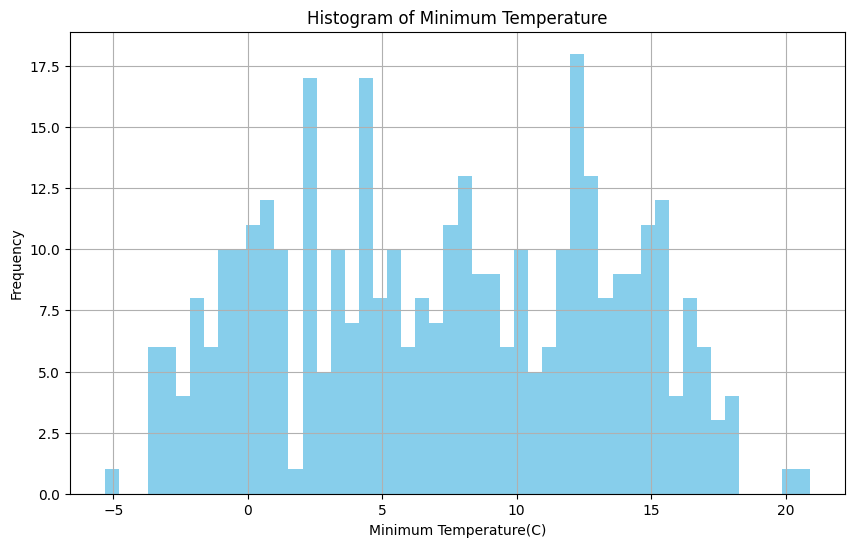

In [6]:
#DATA VISUALIZATION
#Plot for minimum temperature
plt.figure(figsize=(10,6))
plt.hist(min_temp, bins=50, color='skyblue')
plt.title('Histogram of Minimum Temperature')
plt.xlabel('Minimum Temperature(C)')
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

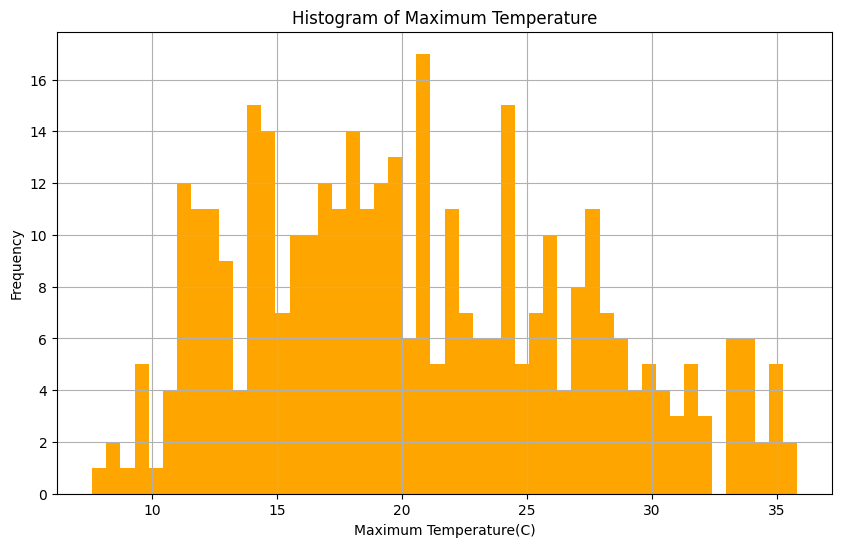

In [7]:
#Plot for maximum temperature
plt.figure(figsize=(10,6))
plt.hist(max_temp, bins=50, color='orange')
plt.title('Histogram of Maximum Temperature')
plt.xlabel('Maximum Temperature(C)')
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

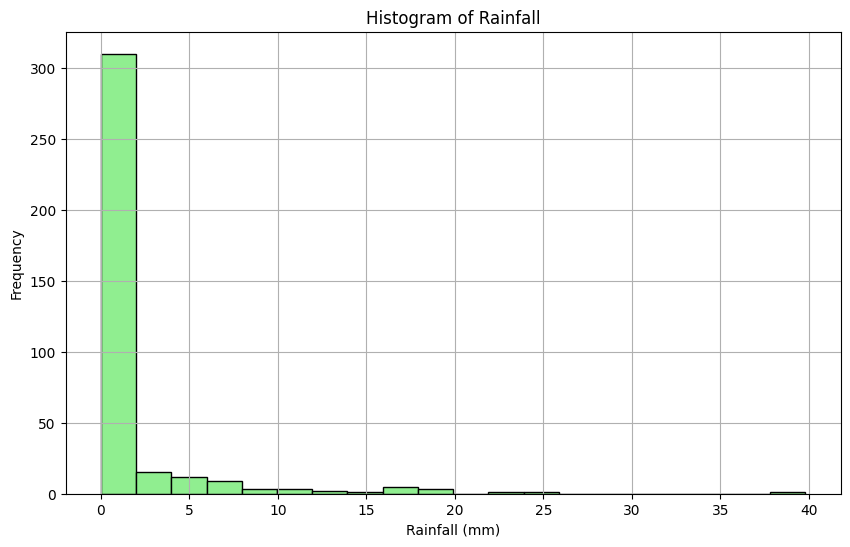

In [8]:
#Plot for rainfall
plt.figure(figsize=(10, 6))
plt.hist(rainfall, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

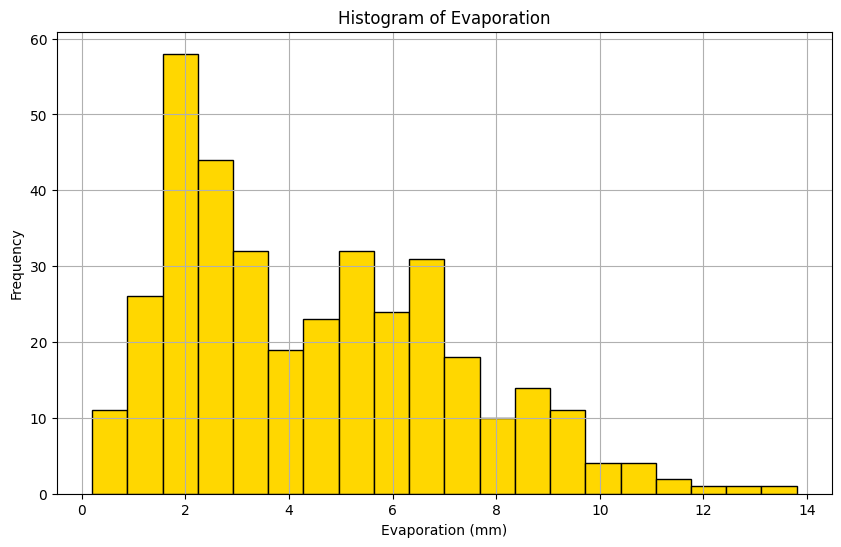

In [9]:
#Plot for evaporation
plt.figure(figsize=(10, 6))
plt.hist(evaporation, bins=20, color='gold', edgecolor='black')
plt.title('Histogram of Evaporation')
plt.xlabel('Evaporation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
#@title Let us insert real dates.
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate a date range (if the frequency is daily and you know the start date)
start_date = datetime(2020, 1, 1)  # Example start date
num_observations = data.shape[0]
dates = [start_date + timedelta(days=i) for i in range(num_observations)]

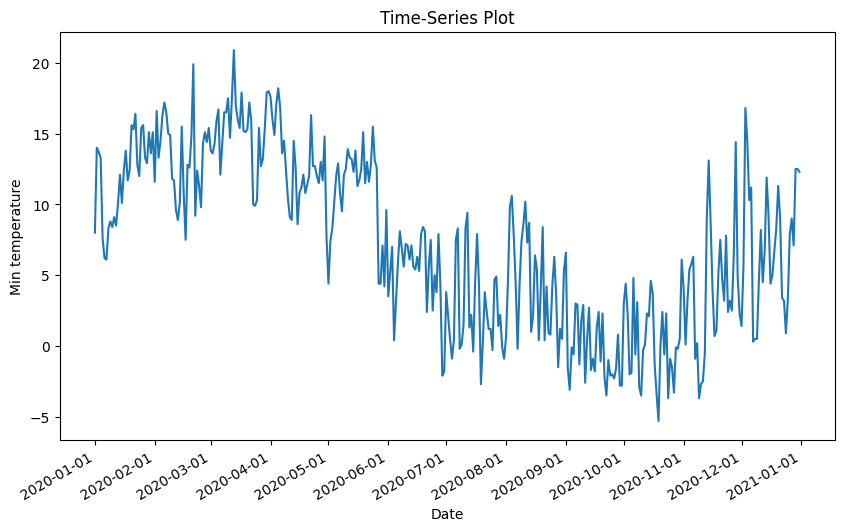

In [11]:
#@title Lineplot
plt.figure(figsize=(10, 6))
plt.plot(dates, data[:, 0], label='MinTemp')  # Using the actual dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels to prevent overlap
plt.xlabel('Date')
plt.ylabel('Min temperature')
plt.title('Time-Series Plot')
plt.show()

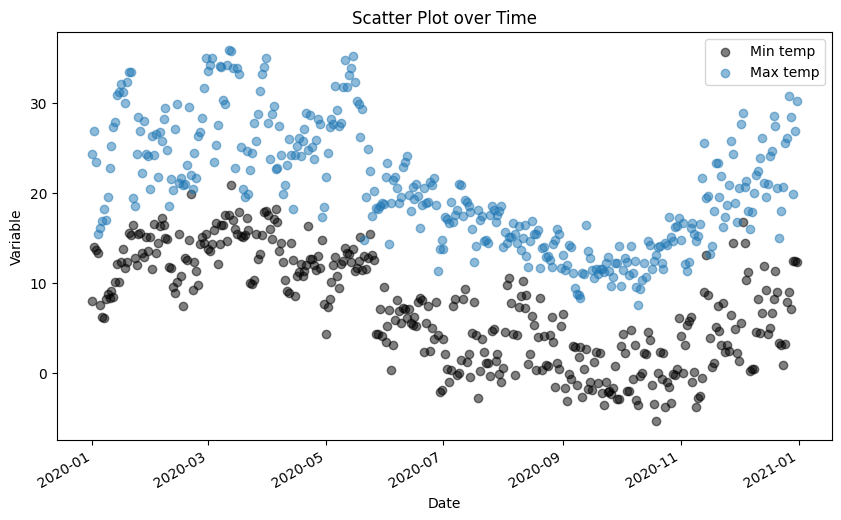

In [12]:
#@title scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dates, data[:, 0], alpha=0.5, label = "Min temp", color = 'k')  # Plotting one variable against the date
plt.scatter(dates, data[:, 1], alpha=0.5, label = "Max temp")
plt.gcf().autofmt_xdate()  # Format the x-axis with date labels
plt.xlabel('Date')
plt.ylabel('Variable')
plt.title('Scatter Plot over Time')
plt.legend()
plt.show()

In [36]:
#@title Some random data
# Ensure plots are styled nicely
import pandas as pd
import seaborn as sns
sns.set_theme()

#Positive correlation data
np.random.seed(0)
x_pos = np.random.rand(100) * 50
y_pos = np.random.normal(0, 5, 100)

# Negative correlation data
x_neg = np.random.rand(100) * 50
y_neg = -x_neg * 0.5 + np.random.normal(0, 5, 100)

#No correlation data 
x_no = np.random.rand(100) * 50
y_no = np.random.normal(0, 5, 100)

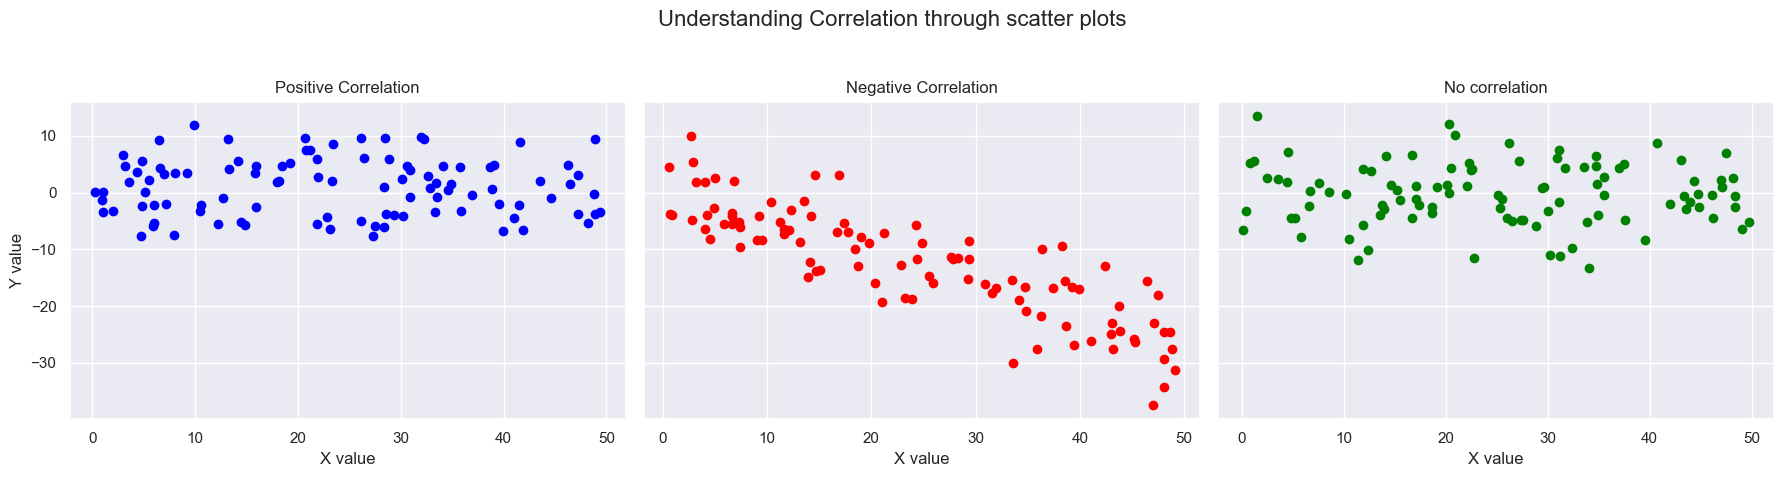

In [14]:
#@title Let us understand it via Vizualization

fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey = True)
fig.suptitle("Understanding Correlation through scatter plots", fontsize = 16)

#Positive correlation plot
axes[0].scatter(x_pos, y_pos, color="blue")
axes[0].set_title("Positive Correlation")
axes[0].set_xlabel("X value")
axes[0].set_ylabel("Y value")

#Negative correlation plot
axes[1].scatter(x_neg, y_neg, color="red")
axes[1].set_title("Negative Correlation")
axes[1].set_xlabel("X value")


#No correlation plot
axes[2].scatter(x_no, y_no, color="green")
axes[2].set_title("No correlation")
axes[2].set_xlabel("X value")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
#Let us get the header i.e., feature names
with open(file_path, 'r') as f:
    feature_names = f.readline().strip().split(',')

feature_names

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

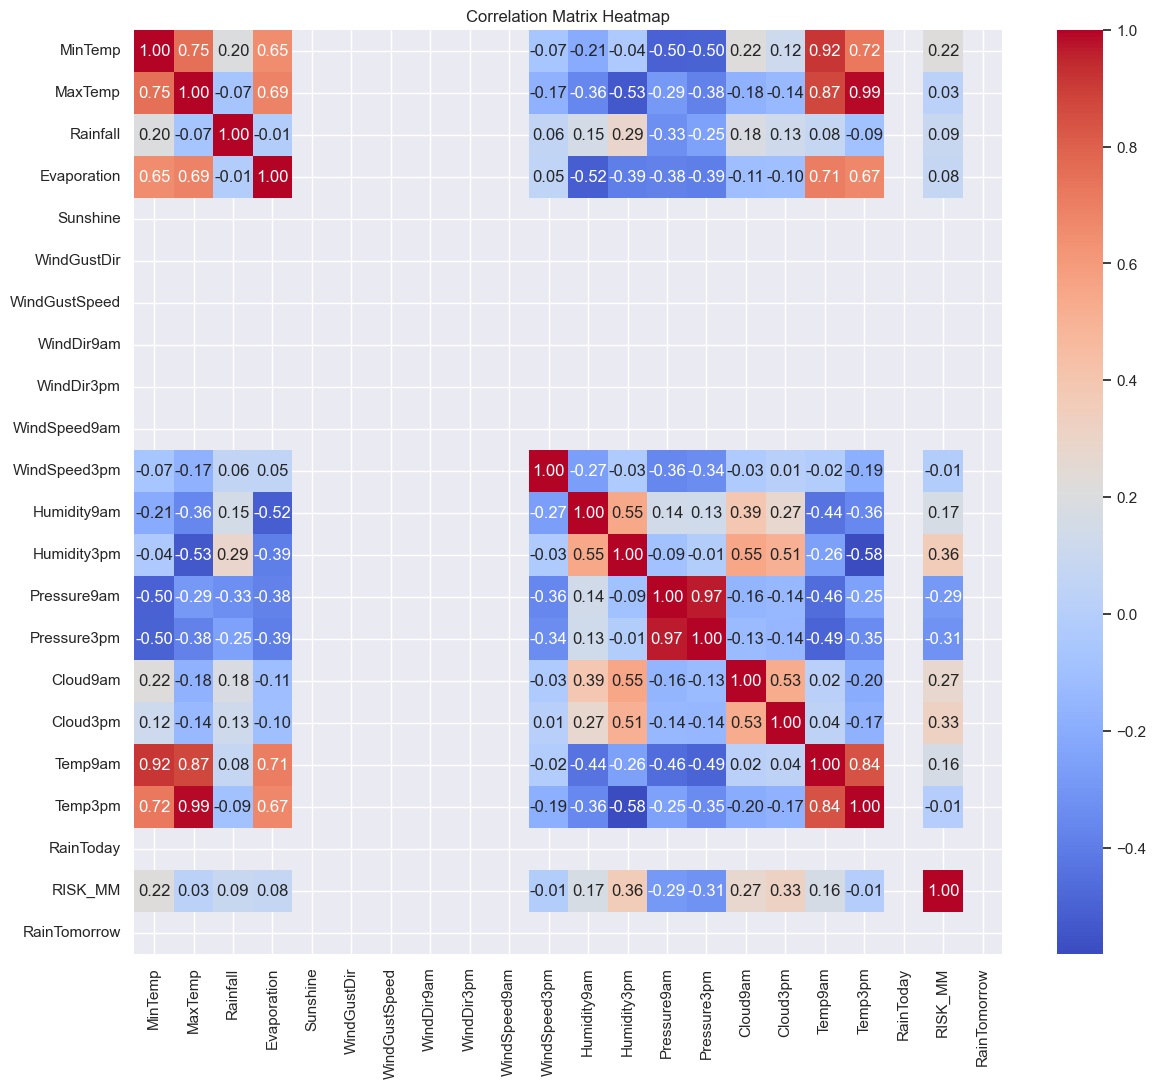

In [22]:
#Let us calculate the correlation matrix of our weather data
#calculate correlation matrix, ignorning Nan values

corr_matrix = np.corrcoef(data, rowvar=False)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=feature_names, yticklabels=feature_names)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\sahil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\sahil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


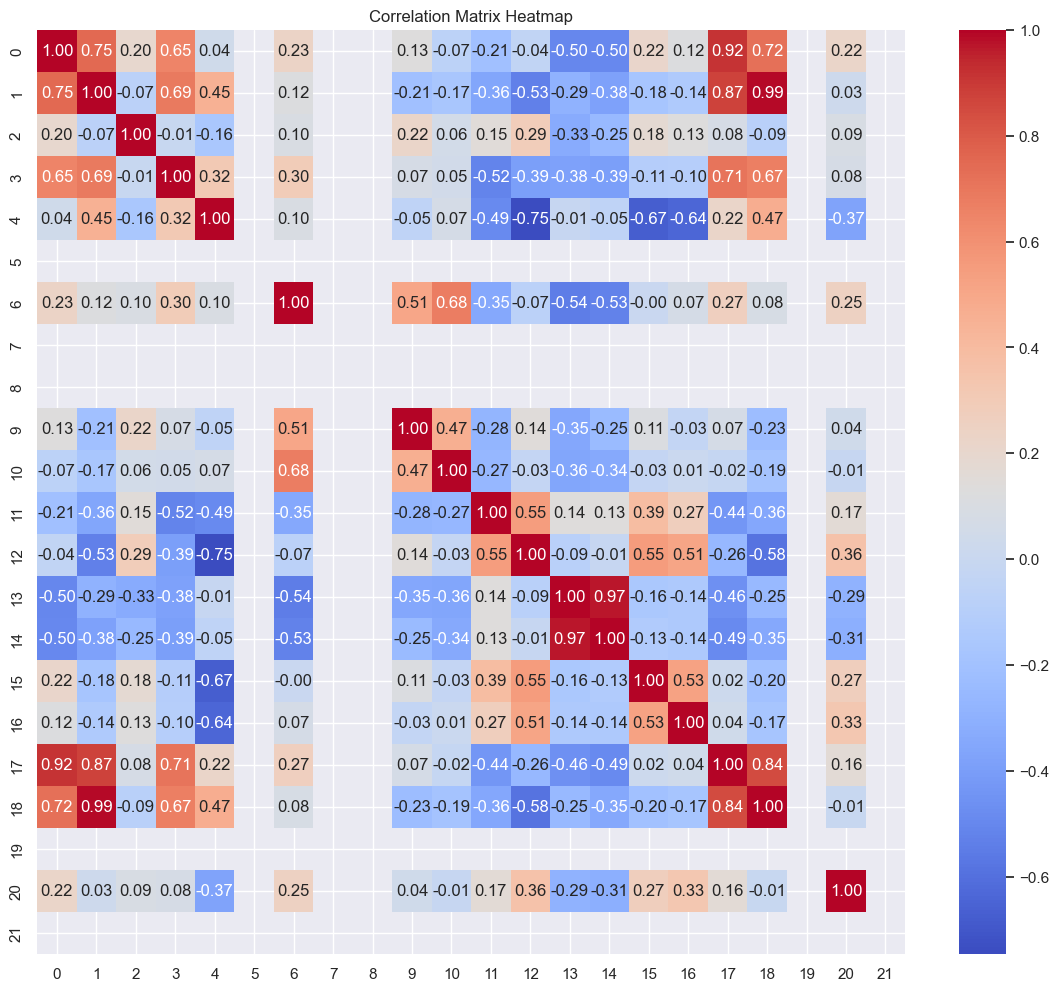

In [42]:

corr_matrix = np.corrcoef(modified_data, rowvar=False)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()